In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

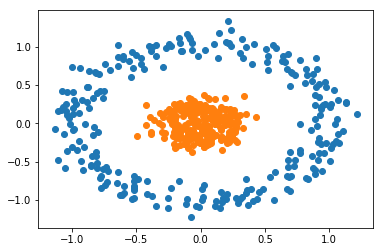

In [4]:
scatter_plot()


In [0]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
    
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
    
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0
  

In [6]:
torch.manual_seed(1)
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241],
        [-0.1455,  0.3597]], requires_grad=True), Parameter containing:
tensor([ 0.0983, -0.0866,  0.1961,  0.0349], requires_grad=True), Parameter containing:
tensor([[ 0.1826, -0.1949, -0.0365, -0.0450]], requires_grad=True), Parameter containing:
tensor([0.0725], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.1)

In [8]:
epochs = 1000
losses =[]
for i in range(epochs):
  y_pred = model.forward(x_data)
  #print(y_pred)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 loss 0.6932405829429626
epoch: 1 loss 0.7032045125961304
epoch: 2 loss 0.6936442852020264
epoch: 3 loss 0.6952237486839294
epoch: 4 loss 0.6984507441520691
epoch: 5 loss 0.6967031955718994
epoch: 6 loss 0.6937360763549805
epoch: 7 loss 0.692794919013977
epoch: 8 loss 0.6939129829406738
epoch: 9 loss 0.6949270963668823
epoch: 10 loss 0.6944333910942078
epoch: 11 loss 0.6929214000701904
epoch: 12 loss 0.6915748715400696
epoch: 13 loss 0.6910344362258911
epoch: 14 loss 0.6909906268119812
epoch: 15 loss 0.6906275749206543
epoch: 16 loss 0.6894038915634155
epoch: 17 loss 0.6873785853385925
epoch: 18 loss 0.6849341988563538
epoch: 19 loss 0.6823129057884216
epoch: 20 loss 0.6793270111083984
epoch: 21 loss 0.6754626631736755
epoch: 22 loss 0.6702608466148376
epoch: 23 loss 0.6635583639144897
epoch: 24 loss 0.655397355556488
epoch: 25 loss 0.6458230018615723
epoch: 26 loss 0.6347777843475342
epoch: 27 loss 0.622117817401886
epoch: 28 loss 0.6077103018760681
epoch: 29 loss 0.5915105938

Text(0.5, 0, 'epoch')

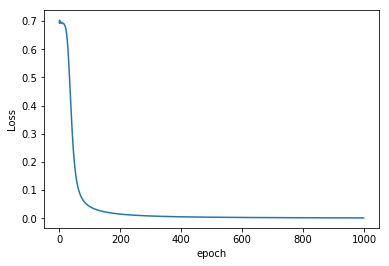

In [9]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')